In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=";")

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

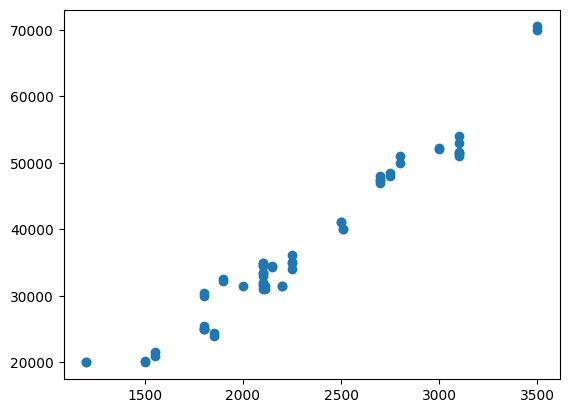

In [5]:
plt.scatter(df['area'], df['rent'])

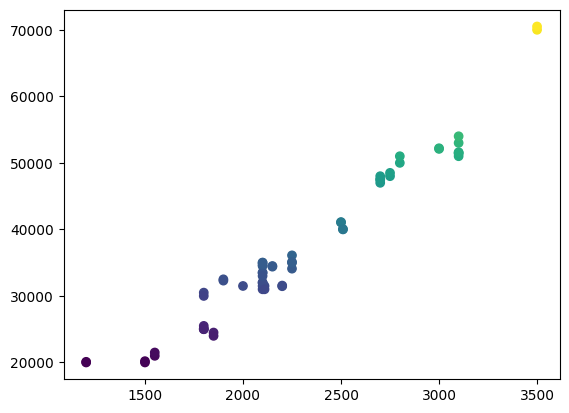

In [6]:
plt.scatter(df['area'], df['rent'],c=df['rent'])

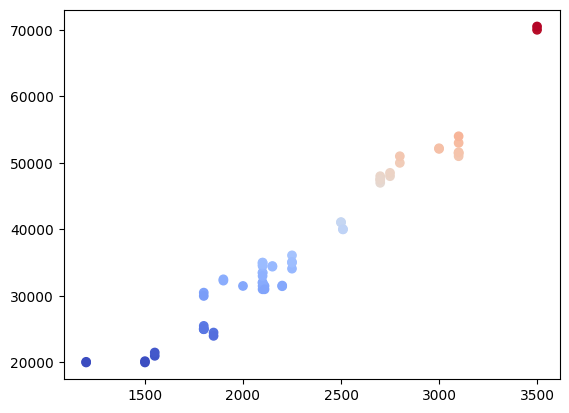

In [7]:
plt.scatter(df['area'], df['rent'], c=df['rent'], cmap='coolwarm')

Text(0.5, 1.0, 'Area vs Rent')

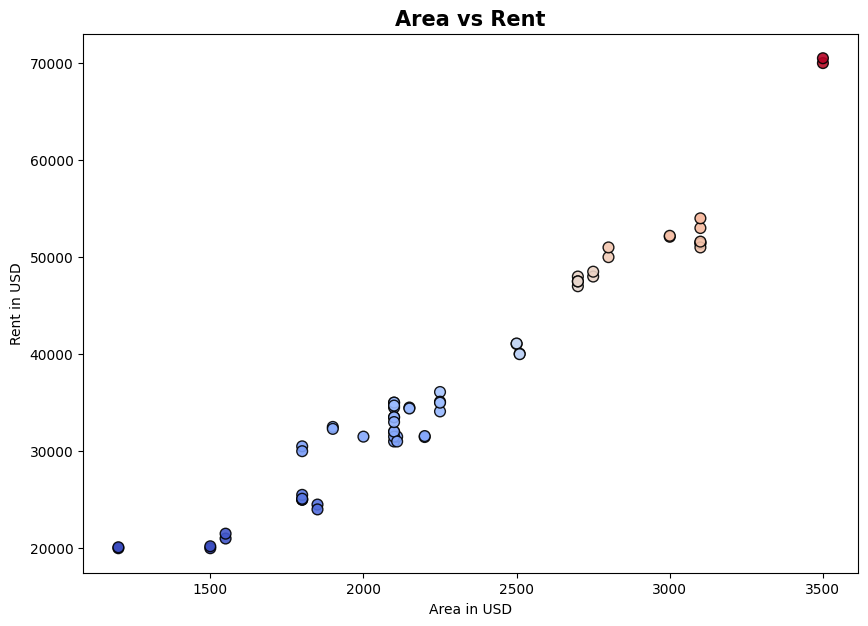

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(df['area'], df['rent'], c=df['rent'], cmap='coolwarm',s=60,alpha=.9,edgecolors='k')
plt.xlabel("Area in USD")
plt.ylabel('Rent in USD')
plt.title("Area vs Rent",fontsize=15,weight="bold")

In [9]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Linear Regression with Hardcoded Formula

In [10]:
x = df['area']
y= df['rent']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)


In [11]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
m

np.float64(21.292661473611954)

In [12]:
c = np.mean(y) - (m * np.mean(x))
c

np.float64(-11469.7354464311)

In [13]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [14]:
m*95.07 + c

np.float64(-9445.44212013481)

In [15]:
m*73.20 + c

np.float64(-9911.112626562704)

Linear Regression using SKLEARN

In [16]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [17]:
reg.fit(df[['area']],y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
reg.coef_

array([21.29266147])

In [19]:
reg.intercept_

np.float64(-11469.735446431114)

In [20]:
reg.predict([[95.07]])

d:\ML-in-python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-9445.44212013])

In [21]:
reg.predict(df[['area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [22]:
df2 = df.copy()

In [23]:
df2['Predicted'] = reg.predict(df[['area']])
df2.head()

,area,rent,Predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [24]:
df2.tail()

,area,rent,Predicted
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


In [25]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

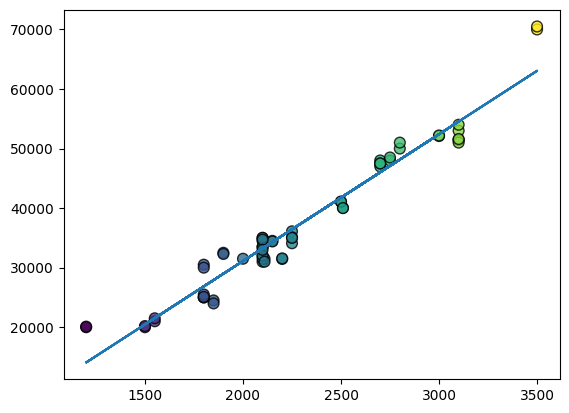

In [26]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.scatter(df['area'], df['rent'], c=df['area'],s=60,alpha=0.8,edgecolors='k')

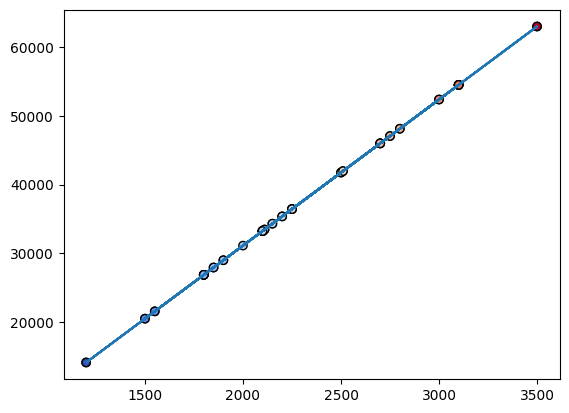

In [27]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.scatter(df['area'], reg.predict(df[['area']]),c=df['area'],cmap='coolwarm',edgecolors='k')

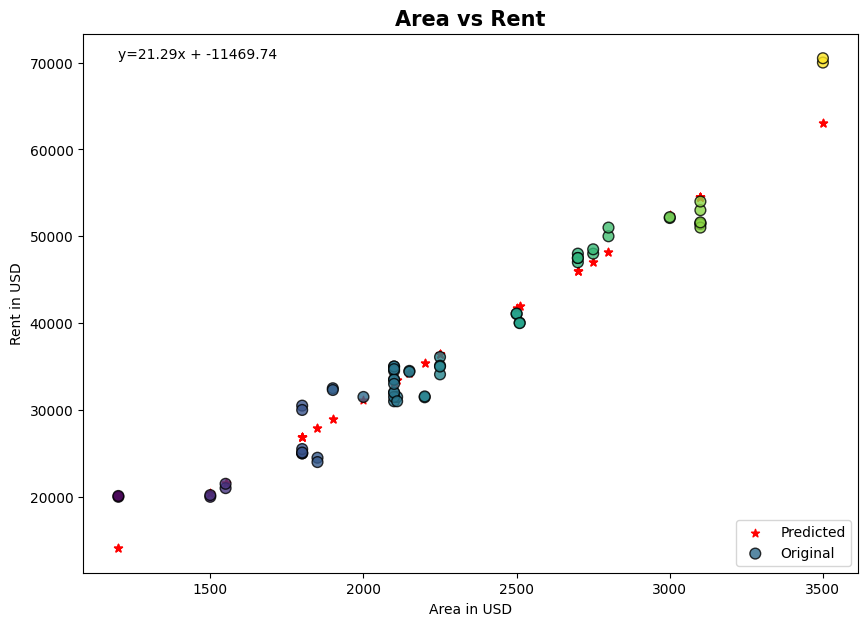

In [28]:
# plt.plot(df[['area']], reg.predict(df[['area']]))
plt.figure(figsize=(10,7))
m=reg.coef_[0]
c=reg.intercept_
equ = f'y={float(m):.2f}x + {float(c):.2f}'
plt.text(min(df["area"]), max(df["rent"])-30, equ)
plt.scatter(df['area'], reg.predict(df[['area']]),color="red",marker='*',label="Predicted")
plt.scatter(df['area'], df['rent'], c=df['area'],s=60,alpha=0.8,edgecolors='k',label="Original")
plt.xlabel('Area in USD')
plt.ylabel('Rent in USD')
plt.title("Area vs Rent",fontsize=15, weight='bold')
plt.plot()
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(df[["rent"]], reg.predict(df[['area']]))

6778077.204095561

In [30]:
mean_absolute_error(df[["rent"]], reg.predict(df[['area']]))

2009.8695093576282